# Predecir el costo de un diamante (price) dado su peso en quilates (carat).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df_diamonds = sns.load_dataset('diamonds')
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df_diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
# Obtenemos la variable dependiente e independiente. (X –> peso en quilates, Y –> precio)
x = df_diamonds['carat'].values.reshape(-1, 1)
y = df_diamonds['price'].values.reshape(-1, 1)

In [8]:
# Usando Scikit-Learn dividimos los datos
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [9]:
# Implementar el modelo de regresión lineal.
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
'''
Una vez que el modelo esta creado se pueden realizar predicciones con regressor.predict() y 
pasar como argumentos los valores que quisieras predecir.
'''
y_pred = regressor.predict(X_train)

In [11]:
'''
Para evaluar el desempeño del modelo en el conjunto de prueba se utiliza el error cuadrático medio y 
el coeficiente de determinación.
'''
print('Coefficients: \n', regressor.coef_)
print('Independent term: \n', regressor.intercept_)
print('Mean Squared Error: %.2f'%r2_score(Y_train, y_pred))

Coefficients: 
 [[7741.37904828]]
Independent term: 
 [-2247.70447085]
Mean Squared Error: 0.85


In [12]:
'''
Para cuantificar la precisión de los resultados se pueden utilizar cualquiera de estos dos métodos 
regressor.score() o bien r2_score()
'''
print(regressor.score(X_test, Y_test))
print('Variance score: %.2f' % r2_score(Y_train, y_pred))

0.8509771156910654
Variance score: 0.85


Text(0.5, 0.98, 'Linear Regression Model')

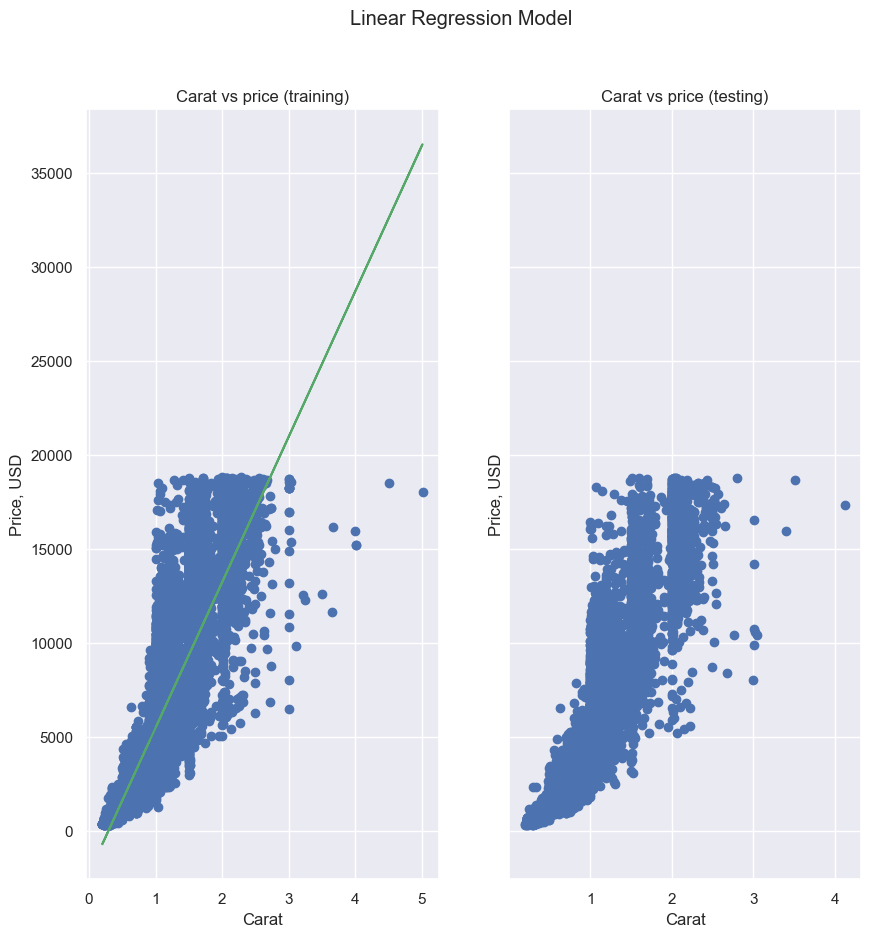

In [13]:
# Graficar los resultados
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize= (10, 10), sharey=True)
ax[0].scatter(X_train, Y_train)
ax[0].plot(X_train, regressor.predict(X_train), c='g')
ax[0].set_title('Carat vs price (training)')
ax[0].set_xlabel('Carat')
ax[0].set_ylabel('Price, USD')
ax[1].scatter(X_test, Y_test)
ax[1].set_title('Carat vs price (testing)')
ax[1].set_xlabel('Carat')
ax[1].set_ylabel('Price, USD')
plt.suptitle('Linear Regression Model')

In [14]:
'''
Para ingresar otra variable independiente (z) que representará la profundidad en milímetro de un 
diamante se puede utilizar el siguiente código.
'''
xx = df_diamonds[['carat', 'z']].values
yy = df_diamonds['price'].values.reshape(-1, 1)
XX_train, XX_test, YY_train, YY_test = train_test_split(xx, yy, test_size=0.3, random_state=0)
regressor.fit(XX_train, YY_train)
regressor.score(XX_test, YY_test)

0.8552958757573261

## Conclusión
Se considera que los test se ajustan en su mayoría al modelo de entrenamiento que se puede notar en las gráficas, lo cual se esperaba dada a la varianza de 0.85 que en sí es alta lo que significa que los datos (puntos) están concentrados.

# Diabetes 
Se desea determinar la progresión de la enfermedad mediante un modelo lineal, 
con base en su IMC

In [93]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
df_diabetes = load_diabetes()

In [69]:
diabetes_x = df_diabetes.data[:,[2]].reshape(-1, 1) # Features -> bmi
diabetes_y = df_diabetes.target # Target: 
print(diabetes_x)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [70]:
print(diabetes_y) # Target

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [94]:
diabetes_X_train, diabetes_x_test, diabetes_Y_train, diabetes_y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [95]:
linear_regression = LinearRegression()
linear_regression.fit(diabetes_X_train, diabetes_Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
diabetes_y_pred = linear_regression.predict(diabetes_X_train)

In [110]:
print('Coeficiente de determinación: ', linear_regression.score(diabetes_x_test, diabetes_y_test))
print('Mean Squared Error: ', mean_squared_error(diabetes_Y_train, diabetes_y_pred))

Coeficiente de determinación:  0.23132831307953805
Mean Squared Error:  3892.7208150824304


Text(0.5, 0.98, 'Linear Regression Model')

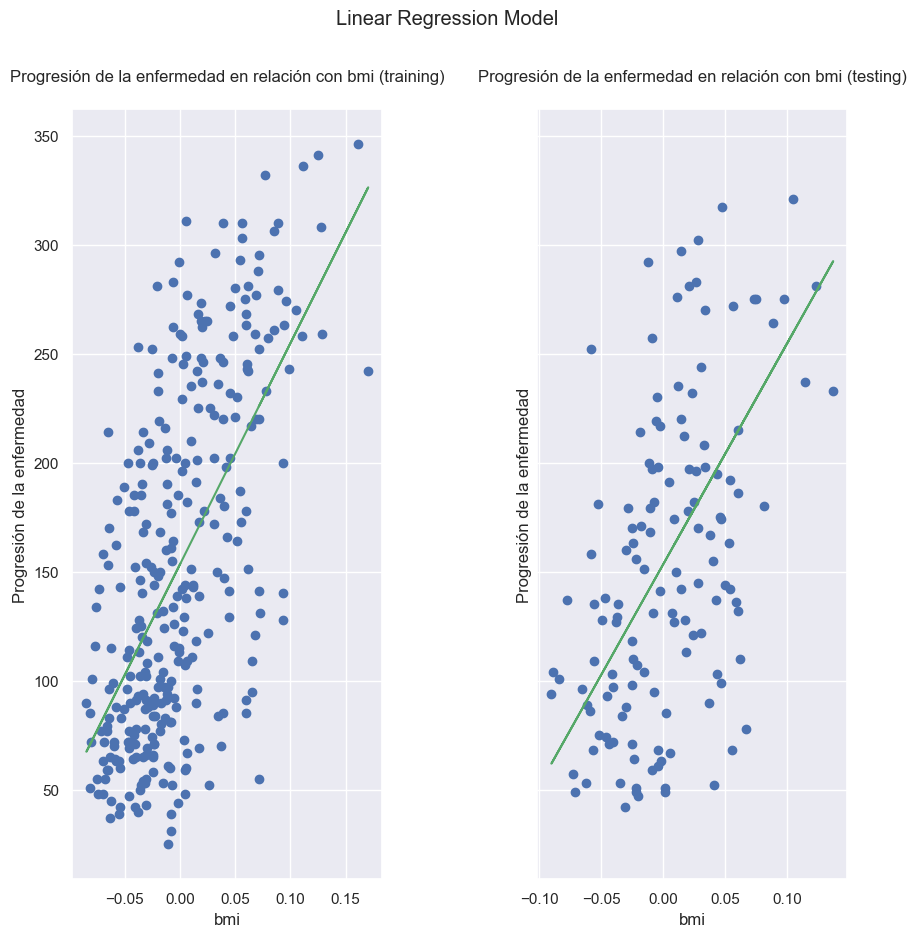

In [109]:
# Graficas
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize= (10, 10), sharey=True)
ax[0].scatter(diabetes_X_train, diabetes_Y_train)
ax[0].plot(diabetes_X_train, linear_regression.predict(diabetes_X_train), c='g')
ax[0].set_title('Progresión de la enfermedad en relación con bmi (training)', pad=20)
ax[0].set_xlabel('bmi')
ax[0].set_ylabel('Progresión de la enfermedad')
ax[1].scatter(diabetes_x_test, diabetes_y_test)
ax[1].plot(diabetes_x_test, linear_regression.predict(diabetes_x_test), c='g')
ax[1].set_title('Progresión de la enfermedad en relación con bmi (testing)', pad=20)
ax[1].set_xlabel('bmi')
ax[1].set_ylabel('Progresión de la enfermedad')
fig.subplots_adjust(wspace=0.5)
plt.suptitle('Linear Regression Model')

## Conclusión

A pesar de que se obtuvieron resultados diferentes a los del documento, se puede deducir que la causa del resultado de este modelo, es porque solo se usó un feature (bmi) de todo el conjunto de features, lo cual afectó drásticamente a los resultados esperados. Por otra parte, en el modelo se puede apreciar que entre los datos de entrenamiento y los de prueba, hay una diferencia en su dispersión lo que indicando que hay cierta variación entre la progresión de la enfermedad relacionado a su Índice de Masa Corporal (IMC o bmi en el dataset)